## 1. What is a neural network? What are the general steps required to build a neural network?

A neural network is a type of machine learning that is designed to mimic the brain's neural network. It can utilize hidden layers with hundreds of nodes and also use backpropagation to improve the network.

- Specify architecture: how many hidden layers, input shape, how many nodes, what sort of activation
- Compile: specifiy optimizer, learning rate(if desired), loss function
- Fit: this is where the backpropagation comes in to adjust the weights of the nodes. You can also define the split of the data here instead of splitting it in advance, and specify the number of epochs to use when fitting.
- Predict: actually make predictions

## 2. Generally, how do you check the performance of a neural network? Why?

Using the loss function, it calculates how the network is performing during each instance/epoch and you can use it to determine when to stop running epochs because the model is doing as well as it can. You also need to do a validation split to make sure that you can check how it performs on unseen data. Also training on the full dataset is computationally expensive.

## 3. Create a neural network using keras to predict the outcome

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
import csv

with open("../abalone.data") as infile, open("abalone.csv", "w") as outfile:
    csv_writer = csv.writer(outfile, delimiter=',')
    #create a row of titles
    csv_writer.writerow(['Sex','Length','Diameter','Height','Whole weight','Shucked weight',
                         'Viscera weight','Shell weight','Rings'])
    for line in infile:
        #check to see how the data is divided so you know what to split the line on
        row = [field.strip() for field in line.split(',')]
        csv_writer.writerow(row)

In [3]:
abalone_df = pd.read_csv('abalone.csv')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# repeated preprocessing from last week
#nominal values
from sklearn.preprocessing import LabelEncoder

sex_labels = LabelEncoder()
abalone_df['Sex'] = sex_labels.fit_transform(abalone_df['Sex'].values)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_df['age']=abalone_df.apply(lambda x: x['Rings']+1.5,axis=1)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [6]:
# define data 
to_drop = abalone_df[['Rings', 'age']]
predictors = np.array(abalone_df.drop(to_drop, axis =1))
target = np.array(abalone_df['age'])
print(predictors.shape, target.shape)



(4177, 8) (4177,)


In [93]:
# create model

n_cols= predictors.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)

#instantiate model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape= (n_cols,)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks= [early_stopping_monitor])



Epoch 1/20
92/92 [==============================] - 1s 4ms/step - loss: 125.9459 - val_loss: 47.1845
Epoch 2/20
92/92 [==============================] - 0s 3ms/step - loss: 33.1986 - val_loss: 10.2421
Epoch 3/20
92/92 [==============================] - 0s 2ms/step - loss: 11.3501 - val_loss: 9.2312
Epoch 4/20
92/92 [==============================] - 0s 2ms/step - loss: 10.0357 - val_loss: 8.1480
Epoch 5/20
92/92 [==============================] - 0s 2ms/step - loss: 9.5565 - val_loss: 7.4883
Epoch 6/20
92/92 [==============================] - 0s 2ms/step - loss: 9.4283 - val_loss: 6.8818
Epoch 7/20
92/92 [==============================] - 0s 3ms/step - loss: 8.7298 - val_loss: 6.5420
Epoch 8/20
92/92 [==============================] - 0s 3ms/step - loss: 7.8549 - val_loss: 6.3280
Epoch 9/20
92/92 [==============================] - 0s 2ms/step - loss: 7.1701 - val_loss: 5.9431
Epoch 10/20
92/92 [==============================] - 0s 2ms/step - loss: 7.2309 - val_loss: 5.7603
Epoch 11/20


In [94]:
# Train a second model to compare
model_1 = Sequential()
model_1.add(Dense(100, activation='relu', input_shape= (n_cols,)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mean_squared_error')

model_1.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks= [early_stopping_monitor])

Epoch 1/20
92/92 [==============================] - 1s 4ms/step - loss: 96.9519 - val_loss: 9.4106
Epoch 2/20
92/92 [==============================] - 0s 3ms/step - loss: 10.4216 - val_loss: 6.8387
Epoch 3/20
92/92 [==============================] - 0s 3ms/step - loss: 7.9272 - val_loss: 5.8116
Epoch 4/20
92/92 [==============================] - 0s 2ms/step - loss: 7.2933 - val_loss: 5.4144
Epoch 5/20
92/92 [==============================] - 0s 2ms/step - loss: 6.4259 - val_loss: 5.0050
Epoch 6/20
92/92 [==============================] - 0s 2ms/step - loss: 6.5890 - val_loss: 4.9748
Epoch 7/20
92/92 [==============================] - 0s 3ms/step - loss: 6.1966 - val_loss: 5.1443
Epoch 8/20
92/92 [==============================] - 0s 2ms/step - loss: 6.2496 - val_loss: 4.5407
Epoch 9/20
92/92 [==============================] - 0s 2ms/step - loss: 5.5317 - val_loss: 4.5162
Epoch 10/20
92/92 [==============================] - 0s 2ms/step - loss: 5.6967 - val_loss: 4.4776
Epoch 11/20
92/92

In [95]:
# Train a third model to compare
model_2 = Sequential()
model_2.add(Dense(150, activation='relu', input_shape= (n_cols,)))
model_2.add(Dense(150, activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mean_squared_error')

model_2.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks= [early_stopping_monitor])

Epoch 1/20
92/92 [==============================] - 1s 9ms/step - loss: 79.3856 - val_loss: 7.6716
Epoch 2/20
92/92 [==============================] - 0s 3ms/step - loss: 8.6286 - val_loss: 5.5948
Epoch 3/20
92/92 [==============================] - 0s 3ms/step - loss: 6.9933 - val_loss: 5.3005
Epoch 4/20
92/92 [==============================] - 0s 3ms/step - loss: 6.5662 - val_loss: 5.1210
Epoch 5/20
92/92 [==============================] - 0s 3ms/step - loss: 5.9898 - val_loss: 4.6682
Epoch 6/20
92/92 [==============================] - 0s 3ms/step - loss: 6.1278 - val_loss: 4.5940
Epoch 7/20
92/92 [==============================] - 0s 3ms/step - loss: 5.8036 - val_loss: 4.7147
Epoch 8/20
92/92 [==============================] - 0s 3ms/step - loss: 5.7999 - val_loss: 4.4727
Epoch 9/20
92/92 [==============================] - 0s 3ms/step - loss: 5.3727 - val_loss: 4.4127
Epoch 10/20
92/92 [==============================] - 0s 3ms/step - loss: 4.7419 - val_loss: 4.3304
Epoch 11/20
92/92 

### Best performing keras model

In [185]:
# fourth model 
# create model

n_cols= predictors.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)


model_3 = Sequential()
model_3.add(Dense(150, activation='relu', input_shape= (n_cols,)))
model_3.add(Dense(150, activation='relu'))
model_3.add(Dense(150, activation='relu'))
model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mean_squared_error')

model_3.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks= [early_stopping_monitor])

Epoch 1/20
92/92 [==============================] - 1s 5ms/step - loss: 70.7295 - val_loss: 6.6344
Epoch 2/20
92/92 [==============================] - 0s 3ms/step - loss: 7.7968 - val_loss: 5.1957
Epoch 3/20
92/92 [==============================] - 0s 3ms/step - loss: 6.7987 - val_loss: 7.0635
Epoch 4/20
92/92 [==============================] - 0s 3ms/step - loss: 6.2820 - val_loss: 4.5976
Epoch 5/20
92/92 [==============================] - 0s 3ms/step - loss: 6.0704 - val_loss: 4.5520
Epoch 6/20
92/92 [==============================] - 0s 3ms/step - loss: 5.3730 - val_loss: 4.5614
Epoch 7/20
92/92 [==============================] - 0s 3ms/step - loss: 5.2370 - val_loss: 4.5059
Epoch 8/20
92/92 [==============================] - 0s 4ms/step - loss: 5.4572 - val_loss: 4.5144
Epoch 9/20
92/92 [==============================] - 0s 3ms/step - loss: 5.1289 - val_loss: 4.4518
Epoch 10/20
92/92 [==============================] - 0s 3ms/step - loss: 5.4179 - val_loss: 4.4276
Epoch 11/20
92/92 

In [186]:
model_3.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 150)               1350      
_________________________________________________________________
dense_60 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_61 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 151       
Total params: 46,801
Trainable params: 46,801
Non-trainable params: 0
_________________________________________________________________


## 4. Write another algorithm using KNN

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(abalone_df.drop(to_drop, axis =1))
y = np.array(abalone_df['age']).reshape(-1)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize  The model performed better without standardization
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(4177, 8) (4177,)
(2923, 8) (2923,)
(1254, 8) (1254,)


In [98]:
#instantiate knn

knn= KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5469333028936754

In [99]:
from sklearn.metrics import mean_squared_error
y_pred= knn.predict(X_test)
mean_squared_error(y_pred, y_test)

4.600691786283892

In [16]:
# try another KNN model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

to_drop = abalone_df[['Rings', 'age']]
X = np.array(abalone_df.drop(to_drop, axis =1))
y = np.array(abalone_df['age']).reshape(-1)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize  The model performed better without standardization
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4177, 8) (4177,)
(2923, 8) (2923,)
(1254, 8) (1254,)


In [36]:
#instantiate knn

knn= KNeighborsRegressor(n_neighbors=30, algorithm='kd_tree', leaf_size=50)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


from sklearn.metrics import mean_squared_error
y_pred= knn.predict(X_test)
mean_squared_error(y_pred, y_test)

4.811446925394294

## 5. Create a neural network using pytorch to predict the same result as question 3. 

In [44]:
import pandas as pd
import torch

from sklearn.model_selection import train_test_split


X = abalone_df.drop(to_drop, axis=1).values
y = abalone_df['age'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Standardize
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

(2923, 8) (1254, 8) (2923,) (1254,)


In [45]:
import torch.nn as nn
import torch.nn.functional as F #this has activation functions
from torch.autograd import Variable

# Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#I think these need to be float tensors rather than long tensors because it's regression
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(X_train)

tensor([[0.0000, 0.5250, 0.4300,  ..., 0.4325, 0.1800, 0.1815],
        [1.0000, 0.4300, 0.3250,  ..., 0.1575, 0.0825, 0.1050],
        [2.0000, 0.4550, 0.3500,  ..., 0.1625, 0.0970, 0.1450],
        ...,
        [2.0000, 0.5100, 0.3950,  ..., 0.2440, 0.1335, 0.1880],
        [2.0000, 0.5750, 0.4650,  ..., 0.5160, 0.2185, 0.2350],
        [0.0000, 0.5950, 0.4750,  ..., 0.5470, 0.2310, 0.2710]])


In [46]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=100, out_features =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        #self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden1, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        #x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [57]:
class ANN3_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, hidden3=20, out_features =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.layer_3_connection = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden3, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = F.relu(self.layer_3_connection(x))
        x = self.out(x)
        return x

In [169]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

In [176]:
# loss function
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.000001)

In [177]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 10.486957550048828
Epoch number: 11 with loss: 10.486957550048828
Epoch number: 21 with loss: 10.486957550048828
Epoch number: 31 with loss: 10.486957550048828
Epoch number: 41 with loss: 10.486957550048828
Epoch number: 51 with loss: 10.486957550048828
Epoch number: 61 with loss: 10.486956596374512
Epoch number: 71 with loss: 10.486956596374512
Epoch number: 81 with loss: 10.486955642700195
Epoch number: 91 with loss: 10.486955642700195
Epoch number: 101 with loss: 10.486955642700195
Epoch number: 111 with loss: 10.486955642700195
Epoch number: 121 with loss: 10.486953735351562
Epoch number: 131 with loss: 10.486953735351562
Epoch number: 141 with loss: 10.486953735351562
Epoch number: 151 with loss: 10.486952781677246
Epoch number: 161 with loss: 10.486952781677246
Epoch number: 171 with loss: 10.486952781677246
Epoch number: 181 with loss: 10.486952781677246
Epoch number: 191 with loss: 10.486952781677246
Epoch number: 201 with loss: 10.486952781677246
Epo

### Best pytorch model

In [50]:
# try a different optimizer

torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

# loss function
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.5)

#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 57614.45703125
Epoch number: 11 with loss: 10.486570358276367
Epoch number: 21 with loss: 10.486570358276367
Epoch number: 31 with loss: 10.486570358276367
Epoch number: 41 with loss: 10.486570358276367
Epoch number: 51 with loss: 10.486570358276367
Epoch number: 61 with loss: 10.486570358276367
Epoch number: 71 with loss: 10.486570358276367
Epoch number: 81 with loss: 10.486570358276367
Epoch number: 91 with loss: 10.486570358276367
Epoch number: 101 with loss: 10.486570358276367
Epoch number: 111 with loss: 10.486570358276367
Epoch number: 121 with loss: 10.486570358276367
Epoch number: 131 with loss: 10.486570358276367
Epoch number: 141 with loss: 10.486570358276367
Epoch number: 151 with loss: 10.486570358276367
Epoch number: 161 with loss: 10.486570358276367
Epoch number: 171 with loss: 10.486570358276367
Epoch number: 181 with loss: 10.486570358276367
Epoch number: 191 with loss: 10.486570358276367
Epoch number: 201 with loss: 10.486570358276367
Epoch n

In [59]:
# try a different model

torch.manual_seed(42)

#instantiate the model
model = ANN3_Model()

# loss function
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

#run model through multiple epochs/iterations
final_loss = []
n_epochs = 200
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 139.0191192626953
Epoch number: 11 with loss: 14.874842643737793
Epoch number: 21 with loss: 14.058676719665527
Epoch number: 31 with loss: 11.880428314208984
Epoch number: 41 with loss: 10.91496753692627
Epoch number: 51 with loss: 10.595457077026367
Epoch number: 61 with loss: 10.515827178955078
Epoch number: 71 with loss: 10.49810791015625
Epoch number: 81 with loss: 10.493562698364258
Epoch number: 91 with loss: 10.49200439453125
Epoch number: 101 with loss: 10.491305351257324
Epoch number: 111 with loss: 10.49091911315918
Epoch number: 121 with loss: 10.49066162109375
Epoch number: 131 with loss: 10.490461349487305
Epoch number: 141 with loss: 10.490291595458984
Epoch number: 151 with loss: 10.490139961242676
Epoch number: 161 with loss: 10.489996910095215
Epoch number: 171 with loss: 10.489867210388184
Epoch number: 181 with loss: 10.489747047424316
Epoch number: 191 with loss: 10.489635467529297


## Full disclosure: Completed this section after the assignment was due
#### After looking at the reading on normalizing and standardizing the data I wanted to see what would happen if I tried using the minmaxscaler on the input and output data and WOW did it make a difference.

(2923, 8) (1254, 8) (2923,) (1254,)


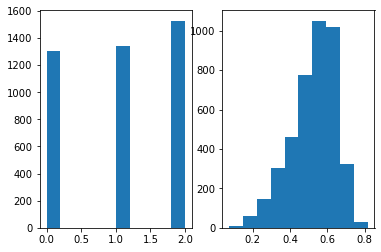

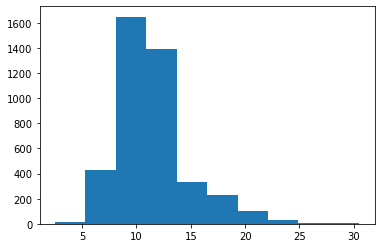

In [37]:
import pandas as pd
import torch

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = abalone_df.drop(to_drop, axis=1).values
y = abalone_df['age'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#histogram of one of the input variables
plt.subplot(121)
plt.hist(X[:, 0])
plt.subplot(122)
plt.hist(X[:, 1])
plt.show()
# histogram of target variable
plt.hist(y)
plt.show()

'''Because all of the features in the training set do NOT have Gaussian distributions 
using a standard scaler will not be helpful'''
#Normalize input data
mms = MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)


#Normalized rather than standardize since the data is slightly skewed although standardized might also work I think
#Normalize output data
# reshape 1d arrays to 2d arrays
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

#fit train data
mms.fit(y_train)
# transform training dataset
y_train = mms.transform(y_train)
# transform test dataset
y_test = mms.transform(y_test)

In [38]:
import torch.nn as nn
import torch.nn.functional as F #this has activation functions
from torch.autograd import Variable

# Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#I think these need to be float tensors rather than long tensors because it's regression
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(X_train)

tensor([[0.0000, 0.6081, 0.6303,  ..., 0.2902, 0.2363, 0.1794],
        [0.5000, 0.4797, 0.4538,  ..., 0.1052, 0.1080, 0.1031],
        [1.0000, 0.5135, 0.4958,  ..., 0.1086, 0.1271, 0.1430],
        ...,
        [1.0000, 0.5878, 0.5714,  ..., 0.1634, 0.1751, 0.1858],
        [1.0000, 0.6757, 0.6891,  ..., 0.3463, 0.2870, 0.2327],
        [0.0000, 0.7027, 0.7059,  ..., 0.3672, 0.3035, 0.2686]])


In [39]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=100, out_features =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        #self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden1, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        #x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [41]:
# try a different optimizer

torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

# loss function
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters())

#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 0.09181395918130875
Epoch number: 11 with loss: 0.01913786679506302
Epoch number: 21 with loss: 0.016999928280711174
Epoch number: 31 with loss: 0.012574262917041779
Epoch number: 41 with loss: 0.010284473188221455
Epoch number: 51 with loss: 0.009650393389165401
Epoch number: 61 with loss: 0.009361721575260162
Epoch number: 71 with loss: 0.009158608503639698
Epoch number: 81 with loss: 0.008995882235467434
Epoch number: 91 with loss: 0.008770848624408245
Epoch number: 101 with loss: 0.0085642971098423
Epoch number: 111 with loss: 0.00836930051445961
Epoch number: 121 with loss: 0.008176770061254501
Epoch number: 131 with loss: 0.007988300174474716
Epoch number: 141 with loss: 0.007795250508934259
Epoch number: 151 with loss: 0.007569951470941305
Epoch number: 161 with loss: 0.0073844357393682
Epoch number: 171 with loss: 0.00722264451906085
Epoch number: 181 with loss: 0.007072461768984795
Epoch number: 191 with loss: 0.0069351461715996265
Epoch number: 201 

In [42]:
#predictions
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = model(data)
        y_pred.append(prediction.argmax().item())
        

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.112100463177515


## 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

The model that seemed to perform the best was the Keras model which got down to a MSE of 3.95, which still isn't great but is better than what I was getting with my best performing decision tree regression.

I think the Keras model performed the best in part because it is designed to be easier to use for beginner developers and for people with less of a math background. It has been easier for me to understand what I'm doing in terms of manipulating Keras than PyTorch, although despite the poor performance the Pytorch model was performing even worse initially.

I think that Keras also performed better than KNN because of the ability to correct using backpropagation.

#### UPDATE after running data with min max scaler
I didn't go back and try the min max scaler on the keras data but I anticipate that it would improve quite a bit. I still don't feel super confident with PyTorch and I still wonder if it didn't perform as well initially because it's a little more mathy and so didn't handle my unscaled data as well as Keras did.